Parsed with column specification:
cols(
  competitorname = col_character(),
  chocolate = col_integer(),
  fruity = col_integer(),
  caramel = col_integer(),
  peanutyalmondy = col_integer(),
  nougat = col_integer(),
  crispedricewafer = col_integer(),
  hard = col_integer(),
  bar = col_integer(),
  pluribus = col_integer(),
  sugarpercent = col_double(),
  pricepercent = col_double(),
  winpercent = col_double()
)
`geom_smooth()` using formula 'y ~ x'


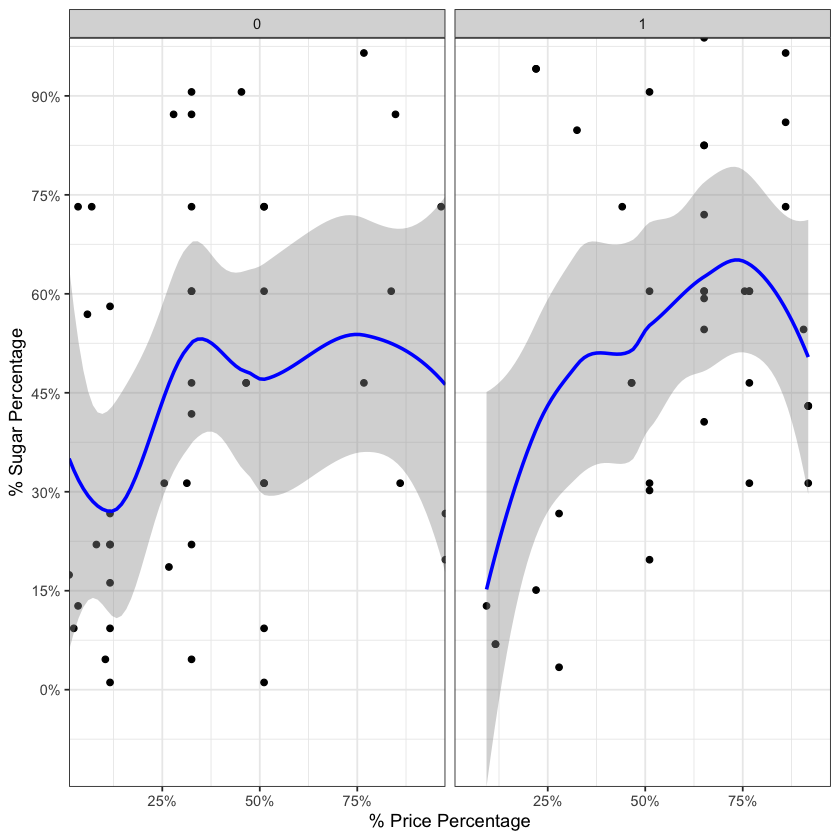

In [30]:
#install.packages("tidyquant")
#library(dplyr)

library(ggplot2)
library(dplyr)
library(tidyr)
library(tidyverse)
#library(tidyquant)
library(readr)
#install.packages("plotly")
#library(plotly)


### Loading candy data from GitHub repository

urlfile2 = "https://raw.githubusercontent.com/ANiraula/data_projects/main/candy-data.csv"
    candy <- read_csv(url(urlfile2), col_names = TRUE, na = c(""), col_types = NULL)

### Creating binary variables w/ 1 if candy wins >= 50% of the time
candy$win <- ifelse(candy$winpercent > 50, 1, 0)

### Visualize simple regression of sugarpercent & pricepercent (by 1/0 win category)
### See that candies in a win group-that are higehr priced- have sugarperecnt spike at 60% vs. 50% for non-win candies
plot <- ggplot(data = candy, aes(x = pricepercent, y = sugarpercent)) + 
             geom_point() +
             facet_wrap(~win)+
             geom_smooth(method = 'loess', color = "blue",span = 0.8)+
             theme_bw()+
             scale_y_continuous(breaks = seq(0, 1, by = 0.15),labels = function(x) paste0(x*100, "%"), 
             name = "% Sugar Percentage", expand = c(0,0)) +
             scale_x_continuous(breaks = seq(0, 1, by = 0.25),labels = function(x) paste0(x*100, "%"), 
             name = "% Price Percentage", expand = c(0,0)) 

plot